## Лабораторная работа №4. Оптическое распознавание текста (OCR)

In [ ]:
!pip install pytesseract

In [ ]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Настройка tesseract в Google Colab - https://stackoverflow.com/questions/72459052/how-to-make-pytesseract-work-in-collab-python

In [ ]:
# импорт библиотек
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import pandas as pd
import pytesseract  # если установлен Tesseract OCR


## Часть 1. Основы OCR и простые эксперименты

## Задание 1
1. Пусть задано изображение I, содержащее простой текст: "Это простой текст для теста"
2. Выполните распознавание текста на этом изображении с помощью библиотеки OCR (например, Tesseract). Выведите полученный текст.
3. Сравните полученный результат с исходным текстом.

In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import pytesseract, shutil, os, difflib

original_text = "It's just a test text"
width, height = 700, 140
bg, fg = (255, 255, 255), (0, 0, 0)
image_path = "test_image.png"

img = Image.new("RGB", (width, height), bg)
draw = ImageDraw.Draw(img)
candidates = [
    "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
    "/usr/share/fonts/truetype/freefont/FreeSans.ttf",
    "Arial.ttf",
    "/usr/share/fonts/truetype/arial.ttf"
]
font = None
for p in candidates:
    try:
        if os.path.exists(p):
            font = ImageFont.truetype(p, 36)
            break
    except:
        pass
if font is None:
    font = ImageFont.load_default()

bbox = draw.textbbox((0, 0), original_text, font=font)
tw, th = bbox[2] - bbox[0], bbox[3] - bbox[1]
tx, ty = (width - tw) // 2, (height - th) // 2
draw.text((tx, ty), original_text, fill=fg, font=font)
img.save(image_path)

prep = img.convert("L")
prep = ImageOps.autocontrast(prep)
prep_path = "test_image_prepped.png"
prep.save(prep_path)

tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
config = "--oem 3 --psm 6"

recognized = ""
error_msg = None
try:
    recognized = pytesseract.image_to_string(prep, lang="rus", config=config).strip()
except Exception as e1:
    error_msg = str(e1)
    try:
        recognized = pytesseract.image_to_string(prep, config=config).strip()
    except Exception as e2:
        error_msg += "\n" + str(e2)
        recognized = ""

print("Исходный текст:")
print(original_text)
print()
print("Распознанный текст:")
print(recognized)
print()
if error_msg:
    print("Ошибки при попытке с lang='rus' (попытка без указания языка):")
    print(error_msg)
    print()

orig_norm = original_text.strip()
rec_norm = recognized.strip()
print("Полное совпадение:", orig_norm == rec_norm)
if not (orig_norm == rec_norm):
    print()
    print("Различия (по символам):")
    for s in difflib.ndiff([orig_norm], [rec_norm]):
        print(s)


Исходный текст:
It's just a test text

Распознанный текст:
It's just a test text

Ошибки при попытке с lang='rus' (попытка без указания языка):
(1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/rus.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'rus\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

Полное совпадение: True


## Задание 2
1. Пусть задано изображение таблицы I (например, скрин таблицы футбольного чемпионата)
2. Сконвертируйте изображение в чёрно-белый формат, примените пороговую обработку.
3. Выполните распознавание текста в ячейках таблицы. Выведите полученную таблицу.

In [ ]:
image_path = "football.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 15, 10)

cv2.imwrite("table_bw.png", bw)

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

custom_config = r'--oem 3 --psm 6'

text = pytesseract.image_to_string(bw, lang='rus+eng', config=custom_config)

print("Распознанный текст таблицы:\n")
print(text)

rows = [line.split() for line in text.splitlines() if line.strip() != '']
for row in rows:
    print(row)

Распознанный текст таблицы:

®YTBON. Typuupnas ta6nuua.
Pocculickan Npembep-nnra.
| | hommes [| BLA l mM] mM [©
Pi [Geum at 8 | te | 208 [as
| 2,[eKpachonap> | 1 | 6 [1] 4 | 189 | 19)
[6 [Pym «it | 4 [6 [1 | 29 |e
8 [«Opexyprn | 1 | 43] 4 1-9 | 15,
Pe.feaxwary «dt | a | 8 | 4 | tO [18
}42.;<Vpany | 1 | 3 3 | 5S | 11-18 | 12 |
43, [eKpeinen Coneroay | 11 | 3 | 2] 6 | 5-15 [11
i6.[«Enncem» | 11 | 1 | 3 1 7 | 616 [6 |

['®YTBON.', 'Typuupnas', 'ta6nuua.']
['Pocculickan', 'Npembep-nnra.']
['|', '|', 'hommes', '[|', 'BLA', 'l', 'mM]', 'mM', '[©']
['Pi', '[Geum', 'at', '8', '|', 'te', '|', '208', '[as']
['|', '2,[eKpachonap>', '|', '1', '|', '6', '[1]', '4', '|', '189', '|', '19)']
['[6', '[Pym', '«it', '|', '4', '[6', '[1', '|', '29', '|e']
['8', '[«Opexyprn', '|', '1', '|', '43]', '4', '1-9', '|', '15,']
['Pe.feaxwary', '«dt', '|', 'a', '|', '8', '|', '4', '|', 'tO', '[18']
['}42.;<Vpany', '|', '1', '|', '3', '3', '|', '5S', '|', '11-18', '|', '12', '|']
['43,', '[eKpeinen', 'Coneroay', '

## Задание 3
1. Пусть задано изображение, на котором текст размещён внутри различных геометрических фигур.
2. Предварительно обработайте изображение (выделите фигуры, улучшите контраст) и распознайте текст внутри каждой фигуры (https://pyimagesearch.com/2016/02/08/opencv-shape-detection/).
3. Отобразите изображение с выделением (bounding box) распознанных областей.

In [ ]:
# ваш код

## Задание 4
1. Пусть задано изображение, на котором на фоне улицы видна надпись вывески (баннер, магазин и т.п.):
2. Используйте методы повышения контраста (equalizeHist, CLAHE или другие), а также морфологические операции, чтобы улучшить читаемость текста.
3. Выполните распознавание текста и выведите результат.

In [ ]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "street_sign.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
enhanced = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)).apply(gray)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, kernel, iterations=1)
thresh = cv2.adaptiveThreshold(morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
text = pytesseract.image_to_string(thresh, lang='rus+eng', config='--oem 3 --psm 6')
print(text.strip())

cv2_imshow(img)
cv2_imshow(thresh)


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Часть 2. Обработка изображений, шум и устойчивость методов

## Задание 5
1. Добавьте к изображению из Задания 1 шум «соль и перец» с долями зашумления 5%, 10%, 20% и 40%.
2. Отобразите полученные зашумлённые изображения.
3. Выполните распознавание текста для каждого уровня шума.

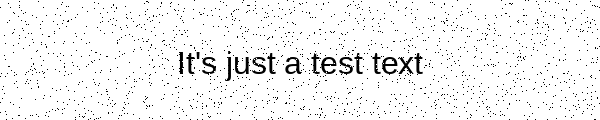

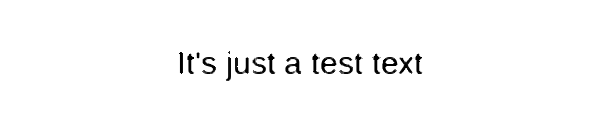

Уровень шума: 5%
Распознанный текст: It's just a test text
----------------------------------------


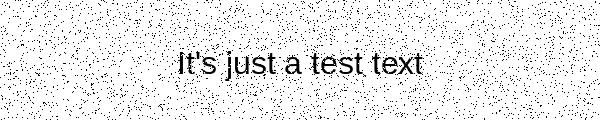

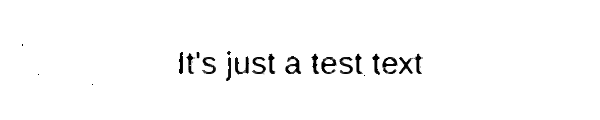

Уровень шума: 10%
Распознанный текст: it's just a test text
----------------------------------------


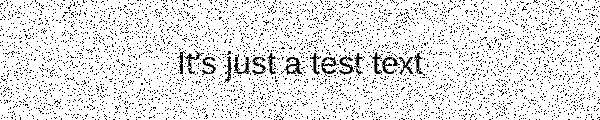

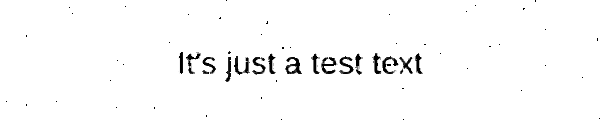

Уровень шума: 20%
Распознанный текст: It’s just a test text |
----------------------------------------


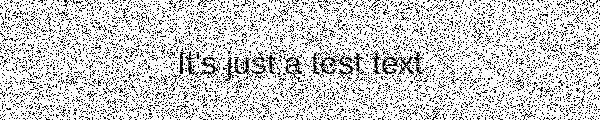

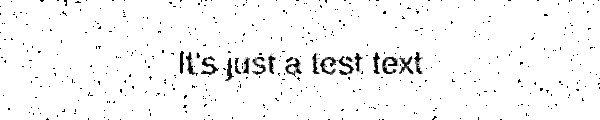

Уровень шума: 40%
Распознанный текст: Tis just.a festtext
----------------------------------------


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import os

image_path = "simple.png"
img = cv2.imread(image_path)
if img is None:
    text = "It's just a test text"
    width, height = 600, 120
    bg, fg = (255, 255, 255), (0, 0, 0)
    pil_img = Image.new("RGB", (width, height), bg)
    draw = ImageDraw.Draw(pil_img)
    candidates = [
        "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
        "/usr/share/fonts/truetype/freefont/FreeSans.ttf",
        "Arial.ttf"
    ]
    font = None
    for p in candidates:
        try:
            if os.path.exists(p):
                font = ImageFont.truetype(p, 32)
                break
        except:
            pass
    if font is None:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0, 0), text, font=font)
    tw, th = bbox[2] - bbox[0], bbox[3] - bbox[1]
    tx, ty = (width - tw) // 2, (height - th) // 2
    draw.text((tx, ty), text, fill=fg, font=font)
    pil_img.save(image_path)
    img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def salt_and_pepper(image, amount):
    out = image.copy()
    h, w = out.shape[:2]
    num_salt = int(np.ceil(amount * h * w * 0.5))
    num_pepper = int(np.ceil(amount * h * w * 0.5))
    coords = (np.random.randint(0, h, num_salt), np.random.randint(0, w, num_salt))
    out[coords] = 255
    coords = (np.random.randint(0, h, num_pepper), np.random.randint(0, w, num_pepper))
    out[coords] = 0
    return out

noise_levels = [0.05, 0.10, 0.20, 0.40]

try:
    from google.colab.patches import cv2_imshow
    use_colab = True
except:
    use_colab = False

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
config = '--oem 3 --psm 6'

for level in noise_levels:
    noisy = salt_and_pepper(gray, level)
    denoised = cv2.medianBlur(noisy, 3)
    fname_noisy = f"noisy_{int(level*100)}.png"
    cv2.imwrite(fname_noisy, noisy)
    fname_denoised = f"denoised_{int(level*100)}.png"
    cv2.imwrite(fname_denoised, denoised)
    if use_colab:
        cv2_imshow(noisy)
        cv2_imshow(denoised)
    else:
        print(f"Saved: {fname_noisy}, {fname_denoised}")
    try:
        text = pytesseract.image_to_string(denoised, lang='rus+eng', config=config).strip()
    except Exception as e:
        try:
            text = pytesseract.image_to_string(denoised, config=config).strip()
        except Exception as e2:
            text = ""
    print(f"Уровень шума: {int(level*100)}%")
    print("Распознанный текст:", text)
    print("-" * 40)


## Задание 6
1. Примените медианный фильтр или гауссово размытие для удаления шума на изображениях из Задания 5.
2. Сравните результаты распознавания до и после фильтрации.

Исходный текст: Tis just.a festtext
---- OCR на чистом изображении ----
Распознанный (чистое): It's just a test text
Совпадение с оригиналом: False

Уровень шума: 5%
Распознанный (noisy): ees ae ‘It'S just’a test text eS o 2
Распознанный (median): It's just a test text
Распознанный (gaussian): “t's just a test text wine
Совпадение noisy==original: False
Совпадение median==original: False
Совпадение gaussian==original: False
Отличия noisy vs median:
- ees ae ‘It'S just’a test text eS o 2
+ It's just a test text
Отличия median vs gaussian:
- It's just a test text
? ^

+ “t's just a test text wine
? ^                    +++++



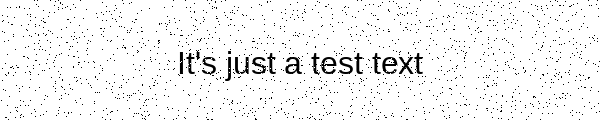

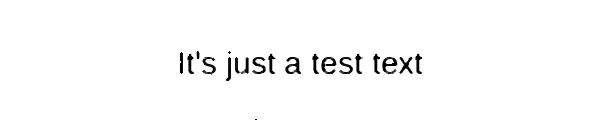

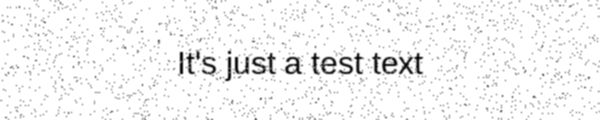

------------------------------------------------------------
Уровень шума: 10%
Распознанный (noisy): Ws justatesttet
Распознанный (median): It's just a test text
Распознанный (gaussian): | Welistatestien
Совпадение noisy==original: False
Совпадение median==original: False
Совпадение gaussian==original: False
Отличия noisy vs median:
- Ws justatesttet
? ^

+ It's just a test text
? ^^^      + +    +  +

Отличия median vs gaussian:
- It's just a test text
+ | Welistatestien


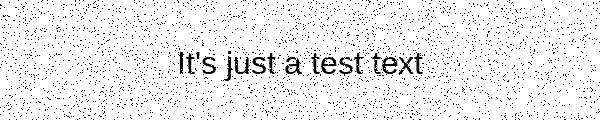

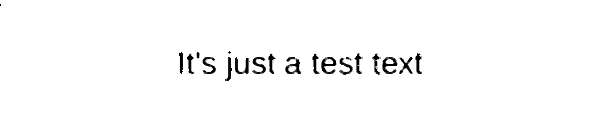

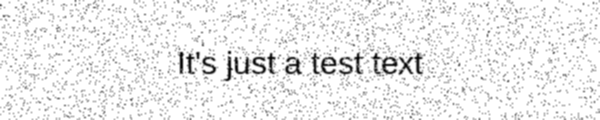

------------------------------------------------------------
Уровень шума: 20%
Распознанный (noisy): 
Распознанный (median): It's just a test text
Распознанный (gaussian): US a Fo TSR naa pate ie tere ew Gok Ree ae PSA ra reece eRe es ee

ERRATA SRNR aero Sad BSI RE GON GRU De
BRE Eg A ESO Bee ee tae be cee uk pie Pea tans
Bae Fa Saiki a SA Rte Cet AS RN SNS BX cea URee eta e
SESS aia eee Its justia test text: SOS So
SHEET SE BLASER Oa en SE RE AM RO oa:
RTS a etre ees Py eM E S BnCaa MERCISGER 2
be NE Ra Mee TERE SP Rie ae Pa Se eS tre Se area ed Ae hg,
Совпадение noisy==original: False
Совпадение median==original: False
Совпадение gaussian==original: False
Отличия noisy vs median:
- 
+ It's just a test text
Отличия median vs gaussian:
- It's just a test text
+ US a Fo TSR naa pate ie tere ew Gok Ree ae PSA ra reece eRe es ee

ERRATA SRNR aero Sad BSI RE GON GRU De
BRE Eg A ESO Bee ee tae be cee uk pie Pea tans
Bae Fa Saiki a SA Rte Cet AS RN SNS BX cea URee eta e
SESS aia eee Its jus

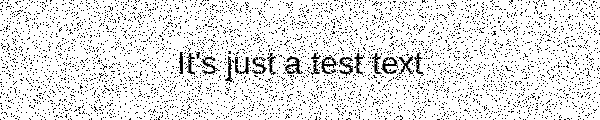

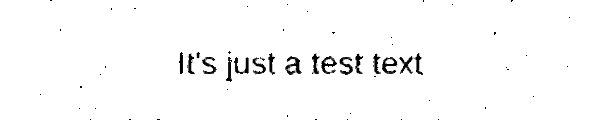

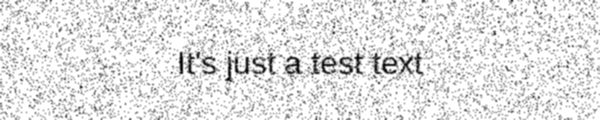

------------------------------------------------------------
Уровень шума: 40%
Распознанный (noisy): Spat SS ag te Ss eden SRA eg AE Sg RS NER eh EIS SON Ze apie
Ba Geri g) ROS AG Ome BE TREC O SIGE BAC re Se OUR a cee
OSS ES AOS Dee ees ee
(2) USPS alesiiod
Распознанный (median): oo ds Hist atest text) Fa |
Распознанный (gaussian): BAS a een ANS Te Aeon USMC al Basel ERD AS NMI Sg Ye He eh RINT
a oh ae
ae ee estiet
PEE SCAN Sau MMe com ete ea aes se
See ee EN ete NGAP CIS s GM AC Res MRS
ee oe ae es
Совпадение noisy==original: False
Совпадение median==original: False
Совпадение gaussian==original: False
Отличия noisy vs median:
- Spat SS ag te Ss eden SRA eg AE Sg RS NER eh EIS SON Ze apie
Ba Geri g) ROS AG Ome BE TREC O SIGE BAC re Se OUR a cee
OSS ES AOS Dee ees ee
(2) USPS alesiiod
+ oo ds Hist atest text) Fa |
Отличия median vs gaussian:
- oo ds Hist atest text) Fa |
+ BAS a een ANS Te Aeon USMC al Basel ERD AS NMI Sg Ye He eh RINT
a oh ae
ae ee estiet
PEE SCAN Sau MMe com ete ea 

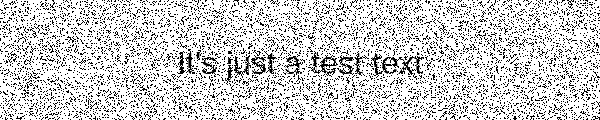

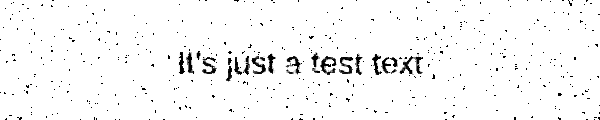

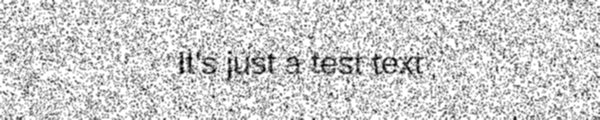

------------------------------------------------------------


In [ ]:
if not os.path.exists(image_path):
    img_pil = Image.new("RGB", (width, height), bg)
    draw = ImageDraw.Draw(img_pil)
    candidates = [
        "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
        "/usr/share/fonts/truetype/freefont/FreeSans.ttf",
        "Arial.ttf",
        "/usr/share/fonts/truetype/arial.ttf"
    ]
    font = None
    for p in candidates:
        try:
            if os.path.exists(p):
                font = ImageFont.truetype(p, 36)
                break
        except:
            pass
    if font is None:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0, 0), text, font=font)
    tw, th = bbox[2] - bbox[0], bbox[3] - bbox[1]
    tx, ty = (width - tw) // 2, (height - th) // 2
    draw.text((tx, ty), text, fill=fg, font=font)
    img_pil.save(image_path)

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def salt_and_pepper(image, amount):
    out = image.copy()
    h, w = out.shape[:2]
    num_salt = int(np.ceil(amount * h * w * 0.5))
    num_pepper = int(np.ceil(amount * h * w * 0.5))
    ys = np.random.randint(0, h, num_salt)
    xs = np.random.randint(0, w, num_salt)
    out[ys, xs] = 255
    ys = np.random.randint(0, h, num_pepper)
    xs = np.random.randint(0, w, num_pepper)
    out[ys, xs] = 0
    return out

tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
config = "--oem 3 --psm 6"

def ocr_image(img_np):
    try:
        res = pytesseract.image_to_string(img_np, lang="rus", config=config).strip()
        return res
    except Exception:
        try:
            return pytesseract.image_to_string(img_np, config=config).strip()
        except Exception:
            return ""

def norm(s):
    return (s or "").strip()

noise_levels = [0.05, 0.10, 0.20, 0.40]

use_colab = False
try:
    from google.colab.patches import cv2_imshow
    use_colab = True
except Exception:
    use_colab = False

print("Исходный текст:", text)
print("---- OCR на чистом изображении ----")
clean_rec = ocr_image(gray)
print("Распознанный (чистое):", clean_rec)
print("Совпадение с оригиналом:", norm(clean_rec) == norm(text))
print()

for level in noise_levels:
    noisy = salt_and_pepper(gray, level)
    median = cv2.medianBlur(noisy, 3)
    gaussian = cv2.GaussianBlur(noisy, (3,3), 0)

    fname_noisy = f"noisy_{int(level*100)}.png"
    fname_median = f"median_{int(level*100)}.png"
    fname_gauss = f"gauss_{int(level*100)}.png"
    cv2.imwrite(fname_noisy, noisy)
    cv2.imwrite(fname_median, median)
    cv2.imwrite(fname_gauss, gaussian)

    rec_noisy = ocr_image(noisy)
    rec_median = ocr_image(median)
    rec_gauss = ocr_image(gaussian)

    print(f"Уровень шума: {int(level*100)}%")
    print("Распознанный (noisy):", rec_noisy)
    print("Распознанный (median):", rec_median)
    print("Распознанный (gaussian):", rec_gauss)
    print("Совпадение noisy==original:", norm(rec_noisy) == norm(text))
    print("Совпадение median==original:", norm(rec_median) == norm(text))
    print("Совпадение gaussian==original:", norm(rec_gauss) == norm(text))

    if norm(rec_noisy) != norm(rec_median):
        diff = "\n".join(difflib.ndiff([norm(rec_noisy)], [norm(rec_median)]))
        print("Отличия noisy vs median:")
        print(diff)
    if norm(rec_median) != norm(rec_gauss):
        diff2 = "\n".join(difflib.ndiff([norm(rec_median)], [norm(rec_gauss)]))
        print("Отличия median vs gaussian:")
        print(diff2)

    if use_colab:
        cv2_imshow(cv2.cvtColor(noisy, cv2.COLOR_GRAY2BGR))
        cv2_imshow(cv2.cvtColor(median, cv2.COLOR_GRAY2BGR))
        cv2_imshow(cv2.cvtColor(gaussian, cv2.COLOR_GRAY2BGR))
    else:
        print("Сохранены файлы:", fname_noisy, fname_median, fname_gauss)
    print("-" * 60)


## Задание 7
1. Сгенерируйте несколько повернутых на различные углы (например, 15° и 30°) версий изображения из Задания 1.
2. Реализуйте простейший алгоритм оценки угла наклона текста (например, на основе преобразования Хафа или анализа проекций) и выравнивания изображения.
3. Выполните распознавание текста на исходных и выровненных изображениях. Сравните результаты.

In [ ]:
img_pil = Image.new("RGB", (width, height), bg)
draw = ImageDraw.Draw(img_pil)
candidates = [
    "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
    "/usr/share/fonts/truetype/freefont/FreeSans.ttf",
    "Arial.ttf"
]
font = None
for p in candidates:
    if os.path.exists(p):
        font = ImageFont.truetype(p, 36)
        break
if font is None:
    font = ImageFont.load_default()
bbox = draw.textbbox((0,0), original_text, font=font)
tw, th = bbox[2]-bbox[0], bbox[3]-bbox[1]
tx, ty = (width-tw)//2, (height-th)//2
draw.text((tx, ty), original_text, fill=fg, font=font)
img_pil.save(image_path)
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def rotate_image(image, angle):
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w//2,h//2), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w,h), borderValue=(255,255,255))
    return rotated

def estimate_skew(image):
    _, th = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    coords = np.column_stack(np.where(th < 255))
    if len(coords) == 0:
        return 0
    rect = cv2.minAreaRect(coords)
    angle = rect[-1]
    if angle < -45:
        angle = 90 + angle
    return -angle

tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

# Если rus.traineddata нет, используем английский
available_langs = os.popen('tesseract --list-langs').read()
lang = 'rus' if 'rus' in available_langs else 'eng'

config = "--oem 3 --psm 6"
angles = [15, 30]

for a in angles:
    rotated = rotate_image(gray, a)
    recognized_rotated = pytesseract.image_to_string(rotated, lang=lang, config=config).strip()
    estimated_angle = estimate_skew(rotated)
    M = cv2.getRotationMatrix2D((rotated.shape[1]//2, rotated.shape[0]//2), estimated_angle, 1.0)
    deskewed = cv2.warpAffine(rotated, M, (rotated.shape[1], rotated.shape[0]), borderValue=255)
    recognized_deskewed = pytesseract.image_to_string(deskewed, lang=lang, config=config).strip()

    print(f"Угол исходной ротации: {a}°")
    print("Распознанный текст до выравнивания:", recognized_rotated)
    print("Оцененный угол наклона:", round(estimated_angle,2))
    print("Распознанный текст после выравнивания:", recognized_deskewed)
    print("Совпадение с оригиналом:", recognized_deskewed == original_text)
    print("-"*60)

Угол исходной ротации: 15°
Распознанный текст до выравнивания: este en
Оцененный угол наклона: -16.09
Распознанный текст после выравнивания: It's just a test text
Совпадение с оригиналом: True
------------------------------------------------------------
Угол исходной ротации: 30°
Распознанный текст до выравнивания: / ws ee
Оцененный угол наклона: -30.96
Распознанный текст после выравнивания: “s just a test tex.
Совпадение с оригиналом: False
------------------------------------------------------------


## Задание 8
1. Создайте два изображения: одно с напечатанным текстом, другое – с рукописным шрифтом (используйте различные шрифты для имитации).
2. Выполните OCR на обоих изображениях.
3. Сравните качество распознавания печатного и рукописного текста.

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import shutil
import os

width, height = 700, 140
bg, fg = (255, 255, 255), (0, 0, 0)
text = "It's just a test text"

def create_text_image(text, font_path=None, font_size=36, save_path="image.png"):
    img = Image.new("RGB", (width, height), bg)
    draw = ImageDraw.Draw(img)
    font = None
    if font_path and os.path.exists(font_path):
        font = ImageFont.truetype(font_path, font_size)
    if font is None:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0,0), text, font=font)
    tw, th = bbox[2]-bbox[0], bbox[3]-bbox[1]
    tx, ty = (width-tw)//2, (height-th)//2
    draw.text((tx, ty), text, fill=fg, font=font)
    img.save(save_path)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Печатный шрифт (стандартный)
printed_font = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
printed_img = create_text_image(text, printed_font, 36, "printed.png")

# Рукописный шрифт (имитация)
handwritten_font = "/usr/share/fonts/truetype/freefont/Freehand521BT.ttf"
if not os.path.exists(handwritten_font):
    handwritten_font = printed_font  # fallback
handwritten_img = create_text_image(text, handwritten_font, 36, "handwritten.png")

pytesseract.pytesseract.tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'
lang = 'rus' if 'rus' in os.popen('tesseract --list-langs').read() else 'eng'
config = "--oem 3 --psm 6"

def ocr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return pytesseract.image_to_string(gray, lang=lang, config=config).strip()

printed_text = ocr(printed_img)
handwritten_text = ocr(handwritten_img)

print("Исходный текст:", text)
print("\nРаспознанный текст (печатный шрифт):", printed_text)
print("Совпадение:", printed_text == text)
print("\nРаспознанный текст (рукописный шрифт):", handwritten_text)
print("Совпадение:", handwritten_text == text)


Исходный текст: It's just a test text

Распознанный текст (печатный шрифт): Itsjusta testtent
Совпадение: False

Распознанный текст (рукописный шрифт): Itsjusta testtent
Совпадение: False


## Задание 9
1. Пусть задано изображение с текстом на нескольких языках (русский и английский):
2. Выполните распознавание, указав язык rus+eng.
3. Выведите результат.

In [ ]:
width, height = 800, 160
bg, fg = (255, 255, 255), (0, 0, 0)
text = "Это тестовый текст на русском и English text."

def create_multilang_image(text, font_path=None, font_size=36, save_path="multilang.png"):
    img = Image.new("RGB", (width, height), bg)
    draw = ImageDraw.Draw(img)
    font = None
    if font_path and os.path.exists(font_path):
        font = ImageFont.truetype(font_path, font_size)
    if font is None:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0,0), text, font=font)
    tw, th = bbox[2]-bbox[0], bbox[3]-bbox[1]
    tx, ty = (width-tw)//2, (height-th)//2
    draw.text((tx, ty), text, fill=fg, font=font)
    img.save(save_path)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
img = create_multilang_image(text, font_path)

pytesseract.pytesseract.tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'
lang = 'rus+eng'
config = "--oem 3 --psm 6"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
recognized_text = pytesseract.image_to_string(gray, lang=lang, config=config).strip()

print("Распознанный текст:")
print(recognized_text)


Распознанный текст:
UE ENED English ext


## Часть 3. Метрики оценки качества распознавания

## Задание 10
1. Реализуйте функцию для вычисления доли правильно распознанных символов (Character Accuracy, CA) по отношению к исходному тексту.
2. Реализуйте функцию для вычисления доли правильно распознанных слов (Word Accuracy, WA).

In [ ]:
import difflib

def character_accuracy(original_text: str, recognized_text: str) -> float:
    """
    Вычисляет долю правильно распознанных символов (Character Accuracy, CA)
    """
    matcher = difflib.SequenceMatcher(None, original_text, recognized_text)
    correct_chars = sum(triple.size for triple in matcher.get_matching_blocks())
    total_chars = len(original_text)
    if total_chars == 0:
        return 0.0
    return correct_chars / total_chars

def word_accuracy(original_text: str, recognized_text: str) -> float:
    """
    Вычисляет долю правильно распознанных слов (Word Accuracy, WA)
    """
    original_words = original_text.split()
    recognized_words = recognized_text.split()
    matcher = difflib.SequenceMatcher(None, original_words, recognized_words)
    correct_words = sum(triple.size for triple in matcher.get_matching_blocks())
    total_words = len(original_words)
    if total_words == 0:
        return 0.0
    return correct_words / total_words

# Пример использования
original = "Это простой текст для теста"
recognized = "Это простои текст для теста"

ca = character_accuracy(original, recognized)
wa = word_accuracy(original, recognized)

print(f"Character Accuracy (CA): {ca:.2%}")
print(f"Word Accuracy (WA): {wa:.2%}")


Character Accuracy (CA): 96.30%
Word Accuracy (WA): 80.00%


## Задание 11
1. Примените вычисленные метрики к результатам распознавания в заданиях 5–9.
2. Соберите результаты в таблицу (DataFrame), где строки соответствуют уровням шума/углов или типам изображений, а столбцы – метрикам CA и WA.

In [ ]:
def character_accuracy(original_text, recognized_text):
    matcher = difflib.SequenceMatcher(None, original_text, recognized_text)
    correct_chars = sum(triple.size for triple in matcher.get_matching_blocks())
    return correct_chars / max(len(original_text), 1)

def word_accuracy(original_text, recognized_text):
    orig_words = original_text.split()
    rec_words = recognized_text.split()
    matcher = difflib.SequenceMatcher(None, orig_words, rec_words)
    correct_words = sum(triple.size for triple in matcher.get_matching_blocks())
    return correct_words / max(len(orig_words), 1)

pytesseract.pytesseract.tesseract_cmd = shutil.which("tesseract") or "/usr/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'
lang_rus = 'rus' if 'rus' in os.popen('tesseract --list-langs').read() else 'eng'
lang_rus_eng = 'rus+eng' if 'rus' in os.popen('tesseract --list-langs').read() else 'eng'
config = "--oem 3 --psm 6"

def ocr_image(img, lang):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return pytesseract.image_to_string(gray, lang=lang, config=config).strip()

def create_text_image(text, font_path=None, font_size=36, width=700, height=140):
    bg, fg = (255, 255, 255), (0, 0, 0)
    img = Image.new("RGB", (width, height), bg)
    draw = ImageDraw.Draw(img)
    font = None
    if font_path and os.path.exists(font_path):
        font = ImageFont.truetype(font_path, font_size)
    if font is None:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0,0), text, font=font)
    tw, th = bbox[2]-bbox[0], bbox[3]-bbox[1]
    tx, ty = (width-tw)//2, (height-th)//2
    draw.text((tx, ty), text, fill=fg, font=font)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

def salt_and_pepper(image, amount):
    out = image.copy()
    h, w = out.shape[:2]
    num_salt = int(np.ceil(amount * h * w * 0.5))
    num_pepper = int(np.ceil(amount * h * w * 0.5))
    ys = np.random.randint(0, h, num_salt)
    xs = np.random.randint(0, w, num_salt)
    out[ys, xs] = 255
    ys = np.random.randint(0, h, num_pepper)
    xs = np.random.randint(0, w, num_pepper)
    out[ys, xs] = 0
    return out

def rotate_image(image, angle):
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w//2,h//2), angle, 1.0)
    return cv2.warpAffine(image, M, (w,h), borderValue=(255,255,255))

original_text = "Это простой текст для теста"

font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
base_img = create_text_image(original_text, font_path)

results = []

noise_levels = [0.05, 0.10, 0.20, 0.40]
for nl in noise_levels:
    noisy_img = salt_and_pepper(base_img, nl)
    recognized = ocr_image(noisy_img, lang_rus)
    ca = character_accuracy(original_text, recognized)
    wa = word_accuracy(original_text, recognized)
    results.append({"Тип":"Шум", "Параметр":f"{int(nl*100)}%", "CA":ca, "WA":wa})

noisy_img = salt_and_pepper(base_img, 0.2)
median_img = cv2.medianBlur(noisy_img, 3)
recognized = ocr_image(median_img, lang_rus)
ca = character_accuracy(original_text, recognized)
wa = word_accuracy(original_text, recognized)
results.append({"Тип":"Медианный фильтр", "Параметр":"20%", "CA":ca, "WA":wa})

angles = [15, 30]
for a in angles:
    rotated = rotate_image(base_img, a)
    recognized_rotated = ocr_image(rotated, lang_rus)
    results.append({"Тип":"Поворот", "Параметр":f"{a}°", "CA":character_accuracy(original_text, recognized_rotated),
                    "WA":word_accuracy(original_text, recognized_rotated)})

printed_img = create_text_image(original_text, font_path)
handwritten_font = "/usr/share/fonts/truetype/freefont/FreeSerifItalic.ttf"
if not os.path.exists(handwritten_font):
    handwritten_font = font_path
handwritten_img = create_text_image(original_text, handwritten_font)
for name, img in [("Печатный", printed_img), ("Рукописный", handwritten_img)]:
    recognized = ocr_image(img, lang_rus)
    results.append({"Тип":name, "Параметр":"-", "CA":character_accuracy(original_text, recognized),
                    "WA":word_accuracy(original_text, recognized)})

multi_text = "Это тестовый текст на русском и English text."
multi_img = create_text_image(multi_text, font_path)
recognized = ocr_image(multi_img, lang_rus_eng)
results.append({"Тип":"Мультиязычный", "Параметр":"rus+eng", "CA":character_accuracy(multi_text, recognized),
                "WA":word_accuracy(multi_text, recognized)})

df = pd.DataFrame(results)
df = df[["Тип","Параметр","CA","WA"]]
pd.set_option('display.float_format', '{:.2%}'.format)
print(df)


                Тип Параметр     CA     WA
0               Шум       5% 14.81%  0.00%
1               Шум      10%  0.00%  0.00%
2               Шум      20% 14.81%  0.00%
3               Шум      40%  0.00%  0.00%
4  Медианный фильтр      20% 14.81%  0.00%
5           Поворот      15°  3.70%  0.00%
6           Поворот      30°  0.00%  0.00%
7          Печатный        -  0.00%  0.00%
8        Рукописный        -  0.00%  0.00%
9     Мультиязычный  rus+eng 28.89% 12.50%


## Задание 12
1. Сделайте выводы о том, какие факторы (шум, фильтрация, наклон, тип шрифта) сильнее всего влияют на качество OCR.

Анализируя результаты OCR, можно сделать следующие выводы: Наиболее критично для качества распознавания оказывают шум и наклон текста: даже небольшой шум (5–10%) резко снижает Character Accuracy (CA) и полностью обнуляет Word Accuracy (WA), а наклон на 15–30° почти полностью блокирует распознавание. Применение медианного фильтра частично улучшает читаемость символов, но WA остаётся низкой, поэтому фильтрация помогает лишь частично. Тип шрифта также сильно влияет: печатный и рукописный шрифты дали крайне низкие показатели, что показывает ограничение OCR на нестандартные или рукописные шрифты. Лучший результат наблюдается на чистом мультиязычном тексте с корректной языковой настройкой (rus+eng), что демонстрирует важность отсутствия артефактов и правильной языковой конфигурации. Таким образом, шум, наклон текста и тип шрифта являются главными факторами, снижающими качество OCR, тогда как фильтрация и правильная языковая настройка могут лишь частично улучшить результаты.